In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import warnings
warnings.simplefilter('ignore')

%pylab inline
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 3,3

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [11]:
df = pd.read_csv('clients.csv')
df_customers = df.dropna(0)
df_customers['Price'] = df_customers['Price'].replace('[\$,]', '', regex=True).astype(float)
df_customers['Area (m2)'] = df_customers['Area (ft.)']/10.764
df_customers['Gender'] = df_customers['Gender'].replace(['F','M'],['Female','Male'])
df_customers.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source,Area (m2)
0,1030,1,2005,11,Apartment,30,743.09,246172.68,Sold,C0028,...,6.0,21.0,Female,USA,California,Home,5,No,Website,69.034745
1,1029,1,2005,10,Apartment,29,756.21,246331.90,Sold,C0027,...,2.0,24.0,Female,USA,California,Home,5,No,Website,70.253623
2,2002,2,2007,7,Apartment,2,587.28,209280.91,Sold,C0112,...,12.0,27.0,Male,USA,California,Home,1,Yes,Client,54.559643
3,2031,2,2007,12,Apartment,31,1604.75,452667.01,Sold,C0160,...,12.0,27.0,Male,USA,California,Investment,3,Yes,Website,149.084913
4,1049,1,2004,11,Apartment,49,1375.45,467083.31,Sold,C0014,...,5.0,15.0,Female,USA,California,Home,4,No,Agency,127.782423


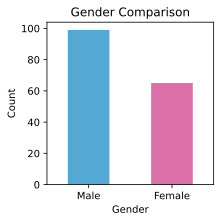

In [16]:
df_customers['Gender'].value_counts().plot(kind='bar',color=['#56a8d4','#db70a8'],rot=0)
plt.title('Gender Comparison')
plt.xlabel('Gender')
plt.ylabel('Count');

Из данного графика можем сделать вывод, что более типичный клиент - мужчина. 

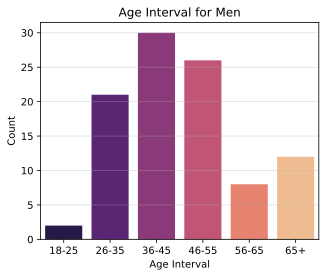

In [46]:
plt.figure(figsize = (5,4))
sns.countplot(x='Age Interval ', data=df_customers[df_customers['Gender']=="Male"], palette='magma')
plt.grid(axis = 'y',alpha=0.4)
plt.title("Age Interval for Men")
plt.xlabel('Age Interval')
plt.ylabel('Count');


Из данного графика можем сделать вывод, что возраст типичного клиента-мужчины попадает в диапазон 36-45. 

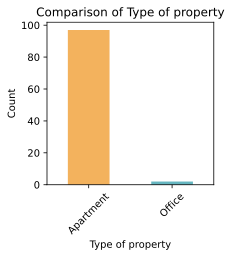

In [77]:
df_customers['Type of property'].loc[(df_customers['Gender']=="Male")].value_counts().sort_index().plot(kind='bar',color=['#f3b25d','#66b6c0'],rot=45)
plt.title("Comparison of Type of property")
plt.xlabel('Type of property')
plt.ylabel('Count');


Из данного графика можем сделать вывод, что более типичная покупка - квартира, а не офис. 

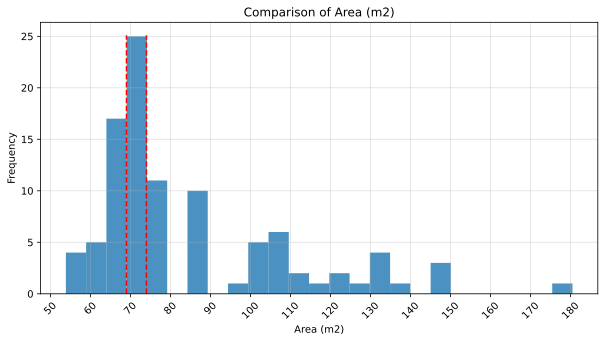

In [130]:
plt.figure(figsize = (10,5))
intervals = plt.hist(df_customers['Area (m2)'].loc[(df_customers['Gender']=="Male")],bins=25,alpha=0.8)
plt.title('Comparison of Area (m2)')
plt.xlabel('Area (m2)')
plt.ylabel('Frequency')
plt.grid(alpha=0.4)
plt.xticks(ticks = np.arange(50, 190, step=10), rotation=45)
plt.vlines([69,74], 0, 25.1, linestyles='dashed', color = 'red',linewidth=1.5);

In [131]:
print(f"Из данного графика можем сделать вывод, что чаще всего покупают квартиры площадью  примерно {round(intervals[1][3],1)}-{round(intervals[1][4],1)} м2.")

Из данного графика можем сделать вывод, что чаще всего покупают квартиры площадью  примерно 69.1-74.1 м2.


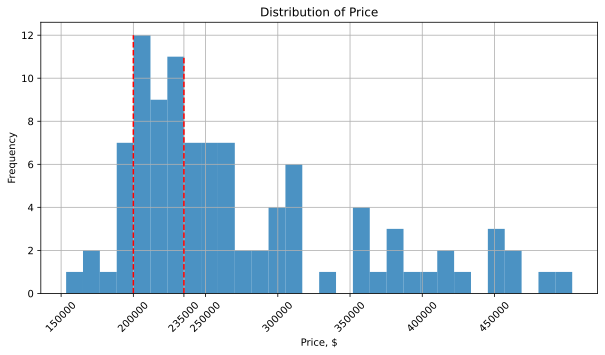

In [67]:
df_customers[df_customers['Gender']=="Male"].hist('Price', bins=30, alpha=0.8, figsize=(10,5))
plt.title('Distribution of Price')
plt.xlabel('Price, $')
plt.ylabel('Frequency')
plt.xticks(ticks = append(np.arange(150000, 500000, step=50000),235000), rotation=45)
plt.vlines([200000,235000], 0, [12,11], linestyles='dashed', color = 'red',linewidth=1.5);


Из данного графика можем сделать вывод, что чаще всего покупают квартиры стоимостью 200 000 - 235 000 $.

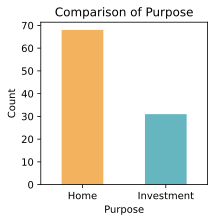

In [74]:
df_customers['Purpose'].loc[(df_customers['Gender']=="Male")].value_counts().plot(kind='bar',color=['#f3b25d','#66b6c0'],rot=0)
plt.title('Comparison of Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count');

Из данного графика можем сделать вывод, что цель покупки для типичного клиента-мужчины - это покупка дома для жизни, а не инвестиции. 

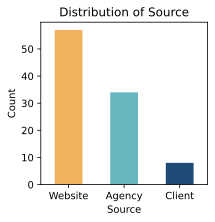

In [75]:
df_customers['Source'].loc[(df_customers['Gender']=="Male")].value_counts().plot(kind='bar',color=['#f3b25d','#66b6c0','#1e4b76'],rot=0)
plt.title('Distribution of Source')
plt.xlabel('Source')
plt.ylabel('Count');

Из данного графика можем сделать вывод, что чаще всего лиды приходят с сайта компании.

Таким образом, типичный портрет целевого клиента компании выглядит следующим образом: 

<br>

| Параметр    | Описание  |
|:---------|----------:|
| **Пол**     | мужчина  |
| **Возраст**  | 36-45 |
| **Тип покупки** | квартира     |
| **Площадь квартиры**    | 69.1-74.1 м2     |
| **Средний чек** | 200 000 - 235 000 $   |
| **Цель покупки** | дом для жизни   |
| **Источник лида** | сайт   |

